Polinomio de interpolación de Lagrange:
   3       2
1 x - 4.5 x + 5.5 x + 1

Error estimado en x = 1.5: 0.019922


<ipython-input-5-559be1004cbe>:35: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (f_n1 / np.math.factorial(n + 1)) * product


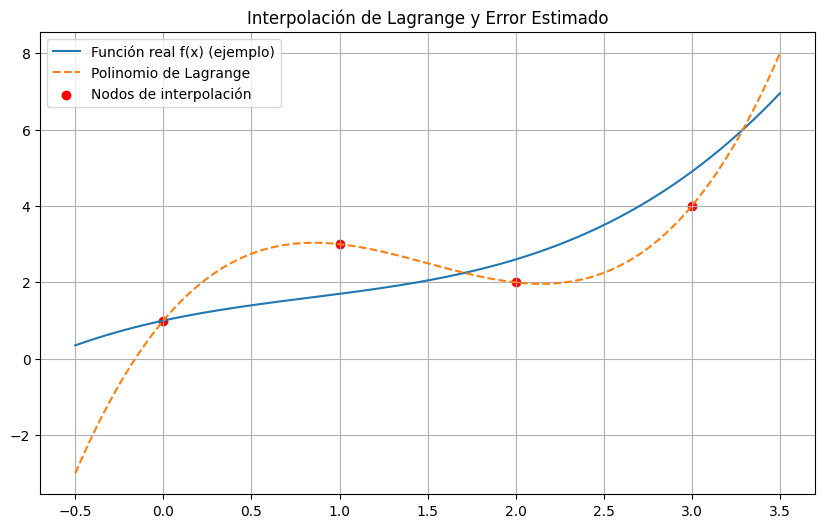

In [5]:
import numpy as np
from scipy.interpolate import lagrange
from scipy.misc import derivative
import matplotlib.pyplot as plt

# datos de ejemplo
x_nodes = np.array([0, 1, 2, 3])
y_nodes = np.array([1, 3, 2, 4])

# 1. p'olinomio de interpolacion de Lagrange
poly = lagrange(x_nodes, y_nodes)

print("Polinomio de interpolación de Lagrange:")
print(poly)

# 2. cálculo del error (suponiendo que conocemos f(x))
def f(x):
    """función original (desconocida en la practica, aqui es un ejemplo)."""
    return 1 + x - 0.5 * x**2 + 0.2 * x**3  # Ejemplo ficticio

def error_interpolacion(x, x_nodes, n):
    """calcula el termino de error para un punto x."""

    def f_n1_derivative(xi):

        h = 1e-5
        return (f(xi + h) - f(xi - h)) / (2 * h)  # aproximación por diferencias centrales

    xi_approx = np.mean(x_nodes)  # aproximación del punto
    f_n1 = f_n1_derivative(xi_approx)

    # productorio
    product = np.prod([(x - xi) for xi in x_nodes])

    return (f_n1 / np.math.factorial(n + 1)) * product

# ejemplo de calculo del error en un punto
x_test = 1.5
n = len(x_nodes) - 1
error = error_interpolacion(x_test, x_nodes, n)

print(f"\nError estimado en x = {x_test}: {error:.6f}")

# 3.grafica
x_vals = np.linspace(min(x_nodes) - 0.5, max(x_nodes) + 0.5, 400)
y_poly = poly(x_vals)
y_true = f(x_vals)  # Solo para comparación (en la práctica no se conoce f(x))

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_true, label='Función real f(x) (ejemplo)')
plt.plot(x_vals, y_poly, '--', label='Polinomio de Lagrange')
plt.scatter(x_nodes, y_nodes, color='red', label='Nodos de interpolación')
plt.title('Interpolación de Lagrange y Error Estimado')
plt.legend()
plt.grid(True)
plt.show()

Valor real en x=1.5: -0.050000
Lagrange: 2.500000, Error estimado: -65.052130
Hermite: 2.287500, Error estimado: -4356169443022114304.000000


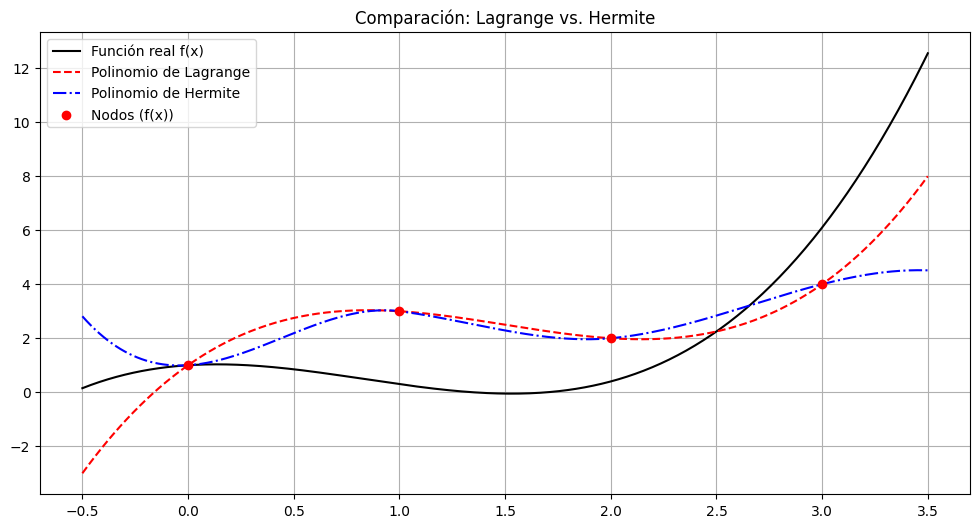

In [9]:
import numpy as np
import math  # Usamos math en lugar de np.math
from scipy.interpolate import lagrange, CubicHermiteSpline
import matplotlib.pyplot as plt

# Datos de ejemplo
x_nodes = np.array([0, 1, 2, 3])
y_nodes = np.array([1, 3, 2, 4])       # Valores de f(x)
dy_nodes = np.array([0.5, -1, 0.7, 2]) # Valores de f'(x)

# Función real (solo para ejemplo)
def f(x):
    return 1 + 0.5*x - 2*x**2 + 0.8*x**3

# Derivada de f(x)
def df(x):
    return 0.5 - 4*x + 2.4*x**2

# --- interpolación de Lagrange ---
lagrange_poly = lagrange(x_nodes, y_nodes)

# --- interpolación de Hermite ---
hermite_poly = CubicHermiteSpline(x_nodes, y_nodes, dy_nodes)

# --- calculo del error teórico (versión mejorada) ---
def error_lagrange(x, x_nodes, f, n_deriv=5):
    n = len(x_nodes) - 1
    product = np.prod([(x - xi) for xi in x_nodes])
    h = 1e-5
    xi = np.mean(x_nodes)

    # Mejor aproximación de la derivada (n+1)-ésima
    def nth_derivative(f, x, n, h=1e-5):
        if n == 0:
            return f(x)
        return (nth_derivative(f, x + h, n-1, h) - nth_derivative(f, x - h, n-1, h)) / (2*h)

    dn1_f = nth_derivative(f, xi, n+1)
    return (dn1_f / math.factorial(n + 1)) * product

def error_hermite(x, x_nodes, f, df, n_deriv=5):
    n = len(x_nodes) - 1
    product = np.prod([(x - xi)**2 for xi in x_nodes])
    h = 1e-5
    xi = np.mean(x_nodes)

    # aproximación de la derivada (2n+2)-ésima
    def nth_derivative(f, x, n, h=1e-5):
        if n == 0:
            return f(x)
        return (nth_derivative(f, x + h, n-1, h) - nth_derivative(f, x - h, n-1, h)) / (2*h)

    d2n2_f = nth_derivative(f, xi, 2*n + 2)
    return (d2n2_f / math.factorial(2*n + 2)) * product

# evauación y comparación
x_test = 1.5
print(f"Valor real en x={x_test}: {f(x_test):.6f}")
print(f"Lagrange: {lagrange_poly(x_test):.6f}, Error estimado: {error_lagrange(x_test, x_nodes, f):.6f}")
print(f"Hermite: {hermite_poly(x_test):.6f}, Error estimado: {error_hermite(x_test, x_nodes, f, df):.6f}")

# - grafica
x_vals = np.linspace(min(x_nodes)-0.5, max(x_nodes)+0.5, 400)
plt.figure(figsize=(12, 6))
plt.plot(x_vals, f(x_vals), 'k-', label='Función real f(x)')
plt.plot(x_vals, lagrange_poly(x_vals), 'r--', label='Polinomio de Lagrange')
plt.plot(x_vals, hermite_poly(x_vals), 'b-.', label='Polinomio de Hermite')
plt.scatter(x_nodes, y_nodes, color='red', zorder=5, label='Nodos (f(x))')
plt.title('Comparación: Lagrange vs. Hermite')
plt.legend()
plt.grid(True)
plt.show()

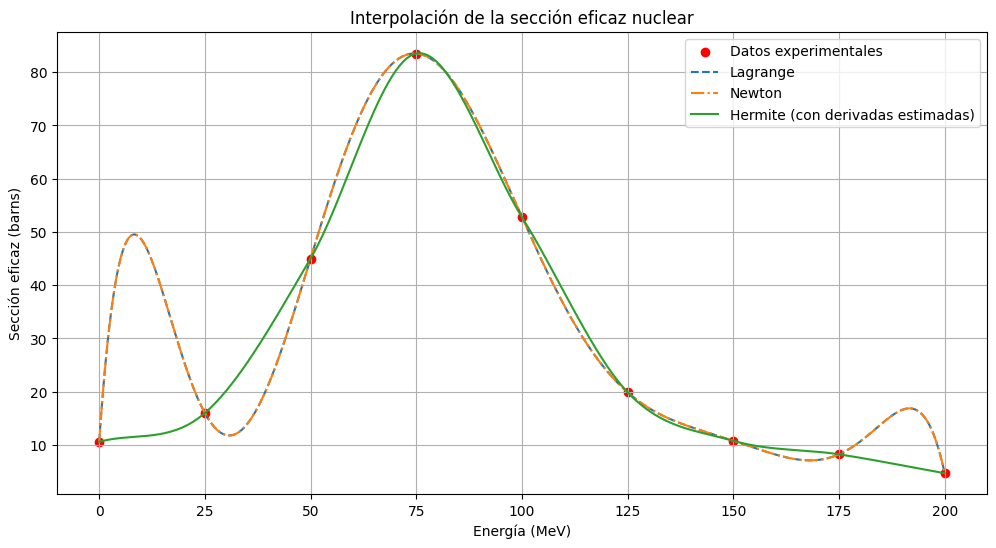

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicHermiteSpline

# Datos
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# Lagrange
poly_lagrange = lagrange(Energia, sigma_exp)

# Newton
coeff_newton = np.polyfit(Energia, sigma_exp, deg=len(Energia)-1)
poly_newton = np.poly1d(coeff_newton)

# Hermite
dy = np.gradient(sigma_exp, Energia)
hermite_poly = CubicHermiteSpline(Energia, sigma_exp, dy)

# evaluación
E_vals = np.linspace(0, 200, 500)
plt.figure(figsize=(12, 6))
plt.scatter(Energia, sigma_exp, color='red', label='Datos experimentales')
plt.plot(E_vals, poly_lagrange(E_vals), '--', label='Lagrange')
plt.plot(E_vals, poly_newton(E_vals), '-.', label='Newton')
plt.plot(E_vals, hermite_poly(E_vals), '-', label='Hermite (con derivadas estimadas)')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz (barns)')
plt.legend()
plt.grid(True)
plt.title('Interpolación de la sección eficaz nuclear')
plt.show()

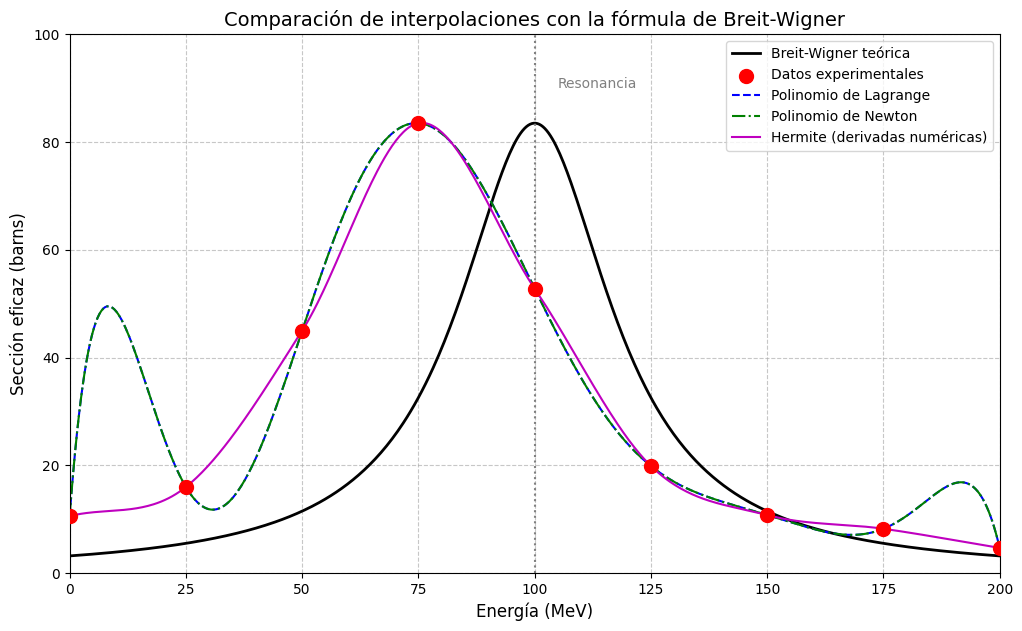

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicHermiteSpline

# datos experimentales
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])  # MeV
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])  # barns

# Función teórica de Breit-Wigner (ejemplo con parámetros típicos)
def breit_wigner(E, E_r=100, Γ=40, σ_max=83.5):
    """σ(E) = σ_max * (Γ²/4) / [(E - E_r)² + Γ²/4]"""
    return σ_max * (Γ**2/4) / ((E - E_r)**2 + Γ**2/4)

# Crear interpolaciones
poly_lagrange = lagrange(Energia, sigma_exp)  # Lagrange
coeff_newton = np.polyfit(Energia, sigma_exp, deg=len(Energia)-1)  # Newton
poly_newton = np.poly1d(coeff_newton)
dy = np.gradient(sigma_exp, Energia)  # Derivadas numéricas para Hermite
hermite_poly = CubicHermiteSpline(Energia, sigma_exp, dy)

# Evaluar en un rango de energías
E_vals = np.linspace(0, 200, 500)
sigma_bw = breit_wigner(E_vals)

# Configuración del gráfico
plt.figure(figsize=(12, 7))

# Curvas teóricas y experimentales
plt.plot(E_vals, sigma_bw, 'k-', linewidth=2, label='Breit-Wigner teórica')
plt.scatter(Energia, sigma_exp, color='red', s=100, zorder=5, label='Datos experimentales')

# interpolaciones
plt.plot(E_vals, poly_lagrange(E_vals), 'b--', linewidth=1.5, label='Polinomio de Lagrange')
plt.plot(E_vals, poly_newton(E_vals), 'g-.', linewidth=1.5, label='Polinomio de Newton')
plt.plot(E_vals, hermite_poly(E_vals), 'm-', linewidth=1.5, label='Hermite (derivadas numéricas)')


plt.xlabel('Energía (MeV)', fontsize=12)
plt.ylabel('Sección eficaz (barns)', fontsize=12)
plt.title('Comparación de interpolaciones con la fórmula de Breit-Wigner', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 200)
plt.ylim(0, 100)


plt.axvline(x=100, color='gray', linestyle=':', label='$E_r$ = 100 MeV')
plt.text(105, 90, 'Resonancia', color='gray')

plt.show()

In [12]:
import numpy as np
from scipy.interpolate import lagrange, CubicHermiteSpline

# Datos experimentales
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

def breit_wigner(E, E_r=100, Γ=40, σ_max=83.5):
    return σ_max * (Γ**2/4) / ((E - E_r)**2 + Γ**2/4)

# crear interpolaciones
poly_lagrange = lagrange(Energia, sigma_exp)
coeff_newton = np.polyfit(Energia, sigma_exp, deg=len(Energia)-1)
poly_newton = np.poly1d(coeff_newton)
dy = np.gradient(sigma_exp, Energia)
hermite_poly = CubicHermiteSpline(Energia, sigma_exp, dy)

# evaluar en 1000 puntos entre 0 y 200 MeV
E_vals = np.linspace(0, 200, 1000)
sigma_bw = breit_wigner(E_vals)

# calcular errores absolutos
error_lagrange = np.abs(sigma_bw - poly_lagrange(E_vals))
error_newton = np.abs(sigma_bw - poly_newton(E_vals))
error_hermite = np.abs(sigma_bw - hermite_poly(E_vals))

# encontrar el error máximo
max_error_lagrange = np.max(error_lagrange)
max_error_newton = np.max(error_newton)
max_error_hermite = np.max(error_hermite)

print(f"Máximo error:")
print(f"- Lagrange: {max_error_lagrange:.4f} barns")
print(f"- Newton:   {max_error_newton:.4f} barns")
print(f"- Hermite:  {max_error_hermite:.4f} barns")

# Identificar el mejor método
errors = {
    "Lagrange": max_error_lagrange,
    "Newton": max_error_newton,
    "Hermite": max_error_hermite
}
best_method = min(errors, key=errors.get)
print(f"\nEl mejor método es **{best_method}** con un error máximo de {errors[best_method]:.4f} barns.")

Máximo error:
- Lagrange: 57.0542 barns
- Newton:   57.0542 barns
- Hermite:  54.3872 barns

El mejor método es **Hermite** con un error máximo de 54.3872 barns.


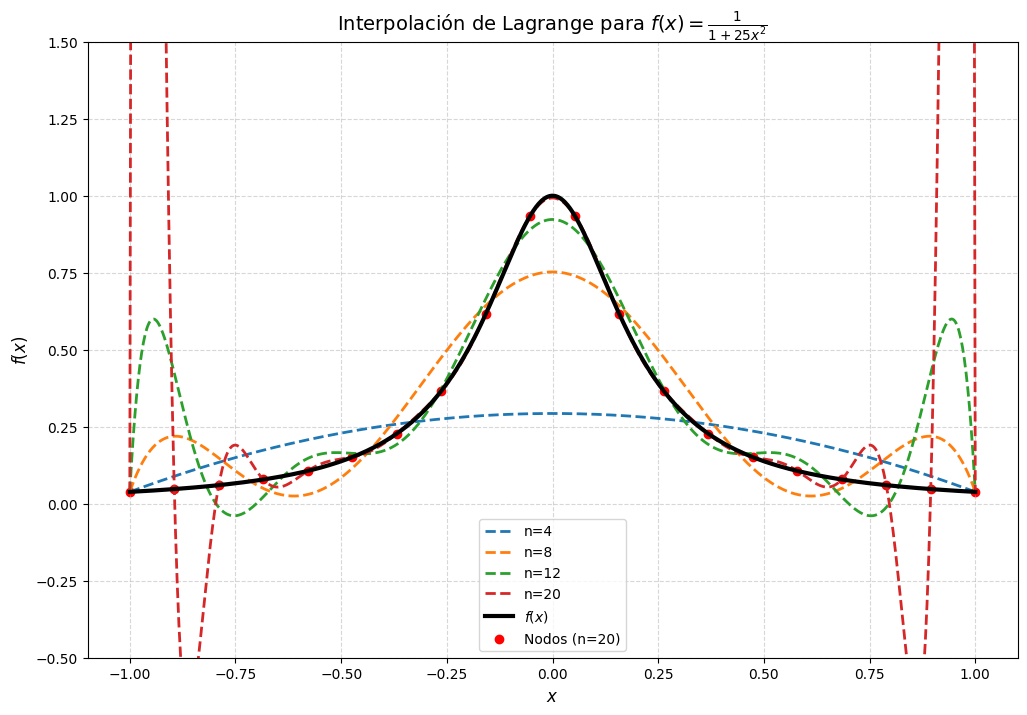

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# función original
def f(x):
    return 1 / (1 + 25 * x**2)

# nodos equiespaciados en [-1, 1]
def get_nodes(n):
    return np.linspace(-1, 1, n)

# Valores para graficar la función original
x_vals = np.linspace(-1, 1, 1000)
y_true = f(x_vals)

# Graficar para distintos n
n_values = [4, 8, 12, 20]
plt.figure(figsize=(12, 8))

for n in n_values:
    # obtener nodos y valores en ellos
    x_nodes = get_nodes(n)
    y_nodes = f(x_nodes)

    # polinomio de Lagrange
    poly = lagrange(x_nodes, y_nodes)

    # evaluar el polinomio
    y_poly = poly(x_vals)

    # gráfica
    plt.plot(x_vals, y_poly, '--', linewidth=2, label=f'n={n}')

# función original
plt.plot(x_vals, y_true, 'k-', linewidth=3, label='$f(x)$')
plt.scatter(get_nodes(20), f(get_nodes(20)), color='red', label='Nodos (n=20)')

# ajustes estéticos
plt.title('Interpolación de Lagrange para $f(x) = \\frac{1}{1+25x^2}$', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(-0.5, 1.5)
plt.show()

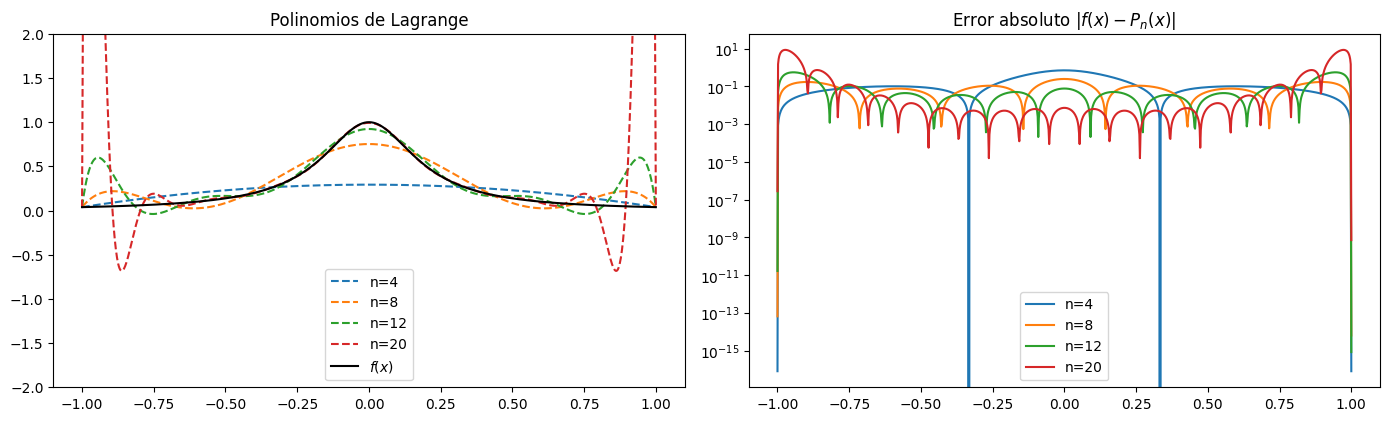

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import sympy as sp

# definición simbolica de la funcion y variables
x_sym = sp.symbols('x')
f_expr = 1 / (1 + 25 * x_sym**2)
f = sp.lambdify(x_sym, f_expr, 'numpy')

# función para calcular el polinomio de Lagrange
def lagrange_poly(n):
    x_nodes = np.linspace(-1, 1, n)
    y_nodes = f(x_nodes)
    return lagrange(x_nodes, y_nodes)

# valores para graficar
x_vals = np.linspace(-1, 1, 1000)
n_values = [4, 8, 12, 20]

plt.figure(figsize=(14, 8))

# graficar para cada n
for n in n_values:
    poly = lagrange_poly(n)
    y_poly = poly(x_vals)
    y_error = np.abs(f(x_vals) - y_poly)

    # gráficas sin calcular la cota teórica del error (problema numérico)
    plt.subplot(2, 2, 1)
    plt.plot(x_vals, y_poly, '--', label=f'n={n}')

    plt.subplot(2, 2, 2)
    plt.plot(x_vals, y_error, label=f'n={n}')


plt.subplot(2, 2, 1)
plt.plot(x_vals, f(x_vals), 'k-', label='$f(x)$')
plt.title('Polinomios de Lagrange')
plt.legend()
plt.ylim(-2, 2)

plt.subplot(2, 2, 2)
plt.title('Error absoluto $|f(x) - P_n(x)|$')
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()

In [8]:
from scipy.interpolate import CubicSpline
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, -1])


cs = CubicSpline(x, y, bc_type='natural')
print(f"Evaluación en x=1.5: {cs(1.5)}")
print("Polinomios por intervalo:")
for i in range(3):
    print(f"s_{i}(x) = {cs.c[:,i]}")

Evaluación en x=1.5: 1.15
Polinomios por intervalo:
s_0(x) = [-0.86666667  0.          1.86666667  1.        ]
s_1(x) = [ 1.33333333 -2.6        -0.73333333  2.        ]
s_2(x) = [-0.46666667  1.4        -1.93333333  0.        ]
